In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [5]:
dfwh = pd.read_csv(r"C:\Users\hp\Desktop\Dataset_2 set\Outlier Detection\weight-height.csv")

In [6]:
dfwh

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [7]:
dfwh["Height"]

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x169dc5a30d0>,
 'caps': [<matplotlib.lines.Line2D at 0x169dc5a3670>,
 'boxes': [<matplotlib.lines.Line2D at 0x169dcaabdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x169dc5a3c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x169dc5a3ee0>],
 'means': []}

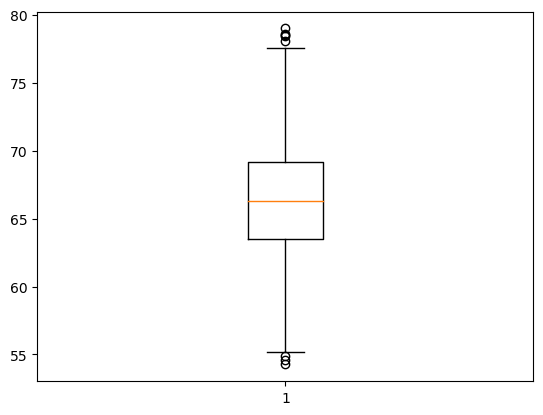

In [8]:
plt.boxplot(dfwh["Height"])

In [9]:
dfwh["Height"].quantile(0.10)

61.41270131336016

In [16]:
low = dfwh["Height"].quantile(0.05)

In [17]:
low

60.24622082610544

In [22]:
dfwh["Height"].quantile(0.95)

72.61710606642384

In [23]:
up = dfwh["Height"].quantile(0.95)

In [24]:
dfwh[ dfwh["Height"] < low ]

,Gender,Height,Weight
1942,Male,59.981865,112.902939
2191,Male,59.938650,141.459579
2334,Male,59.380650,136.391006
3020,Male,60.217019,146.956646
4170,Male,60.243718,153.831429
...,...,...,...
9978,Female,57.375759,114.192209
9984,Female,59.047029,111.707369
9988,Female,59.538729,121.244876
9993,Female,60.030434,97.687432


In [25]:
dfwh[ dfwh["Height"] > up]

,Gender,Height,Weight
0,Male,73.847017,241.893563
2,Male,74.110105,212.740856
23,Male,75.205974,228.761781
27,Male,72.800844,206.828189
31,Male,74.033808,212.910225
...,...,...,...
4975,Male,73.339590,217.061053
4977,Male,74.043290,219.337909
4989,Male,72.726342,218.766294
4994,Male,73.092871,193.944181


In [26]:
dfwh[ (dfwh["Height"] < low) | (dfwh["Height"] > up) ]

,Gender,Height,Weight
0,Male,73.847017,241.893563
2,Male,74.110105,212.740856
23,Male,75.205974,228.761781
27,Male,72.800844,206.828189
31,Male,74.033808,212.910225
...,...,...,...
9978,Female,57.375759,114.192209
9984,Female,59.047029,111.707369
9988,Female,59.538729,121.244876
9993,Female,60.030434,97.687432


### Trimming

In [27]:
dfwh[ (dfwh["Height"]>= low) & (dfwh["Height"]<=up) ]

,Gender,Height,Weight
1,Male,68.781904,162.310473
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


### Capping

In [28]:
dfwh["Height"]

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [29]:
# dfwh["Height"].map( lambda x : low  if x < low else up if x > up else x)

In [30]:
# dfwh["Height"].apply(lambda x : low if x < low else up if x > up else x)

0       72.617106
1       68.781904
2       72.617106
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [31]:
dfwh["Height"].mean()

66.36755975482106

In [32]:
m = dfwh["Height"].mean()

In [33]:
dfwh["Height"].map(lambda x : m if x < low else m if x > up else x)

0       66.367560
1       68.781904
2       66.367560
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

###  np.where

In [34]:
# np.where(<condition>, <true output>, <false output>)

In [36]:
np.where( dfwh["Height"] < low, low, (np.where(dfwh["Height"] > up, up, dfwh["Height"])))

array([72.61710607, 68.78190405, 72.61710607, ..., 63.86799221,
       69.03424313, 61.94424588])

In [39]:
dfwh["Height"] = dfwh["Height"].map(lambda x : m if x < low else m if x > up else x)

In [40]:
dfwh[ (dfwh["Height"] < low) | (dfwh["Height"] > up) ]

,Gender,Height,Weight
